
___
# Recommendation System
___

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [49]:
df = pd.read_csv('MovieRatings.csv')
df.head()

,Unnamed: 0,user_id,item_id,rating,timestamp,title
0,0,0,50,5,881250949,Star Wars (1977)
1,1,290,50,5,880473582,Star Wars (1977)
2,2,79,50,4,891271545,Star Wars (1977)
3,3,2,50,5,888552084,Star Wars (1977)
4,4,8,50,5,879362124,Star Wars (1977)


# Exploratatory Data Analysis

## Import Visualization Modules

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

We need to create a dataframe (title, avg. ratings, no. of ratings)

For this we create a dataframe (title, avg. ratings)

and group it with dataframe (title, no. of ratings)

In [36]:
# Find average of the rating for each movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

# Combine it with no. of ratings column
ratings['no. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Visualizing data for better understanding

<Axes: >

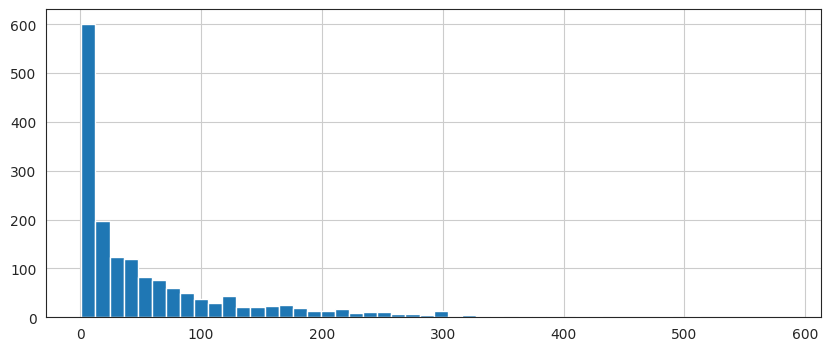

In [40]:
plt.figure(figsize=(10,4))
ratings['no. of ratings'].hist(bins=50)

<Axes: >

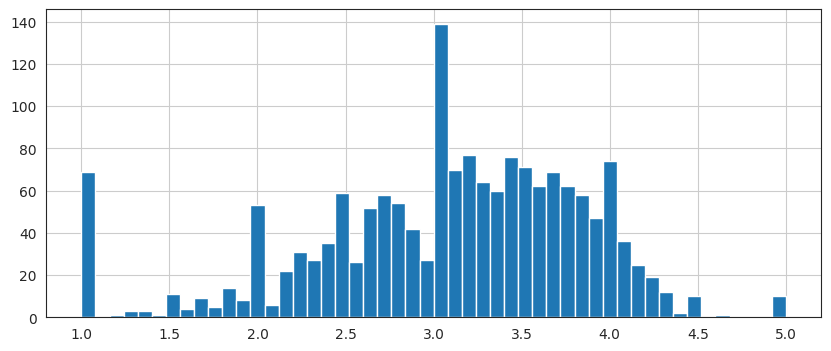

In [41]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

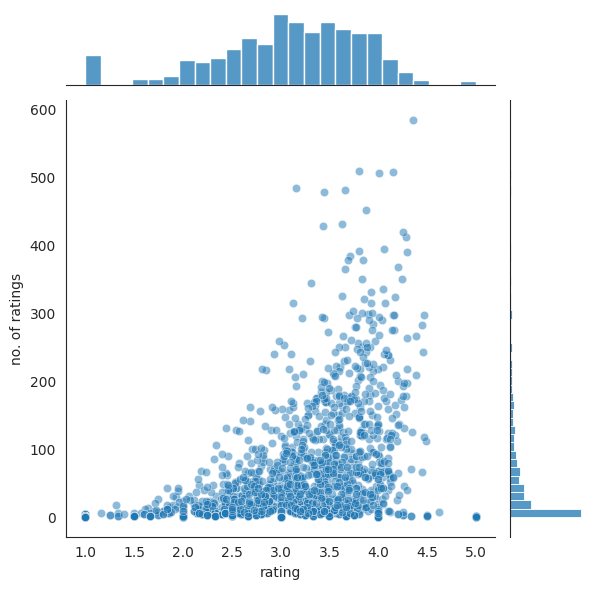

In [42]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings,alpha=0.5)

___
## Recommending Similar Movies
___

A movie matrix is created (user_id vs movie title)

In [29]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [30]:
movieName = "Star Wars (1977)"

We can then use corrwith() method to get correlations between two pandas series

In [31]:
similar_movies = moviemat.corrwith(moviemat[movieName])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series

In [33]:
movie_corr = pd.DataFrame(similar_movies,columns=['Correlation'])
movie_corr.dropna(inplace=True)
movie_corr = movie_corr.join(ratings['no. of ratings'])
movie_corr.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


To have quality results we only display movies with more than 100 ratings

Now we sort the correlation value to get the best result on top

In [55]:
movie_corr[movie_corr['no. of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


The code in a function

In [52]:
def getRecomendation(movie_name):
  similar_movies = moviemat.corrwith(moviemat[movieName])
  movie_corr = pd.DataFrame(similar_movies,columns=['Correlation'])
  movie_corr.dropna(inplace=True)
  movie_corr = movie_corr.join(ratings['no. of ratings'])
  movie_corr[movie_corr['no. of ratings']>100].sort_values('Correlation',ascending=False).head()

In [54]:
getRecomendation("Angry Men (1957)")

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
